In [21]:
import pandas as pd

df1 = pd.read_excel("0_赛题\\附件.xlsx", sheet_name="表单1")
df2 = pd.read_excel("0_赛题\\附件.xlsx", sheet_name="表单2")
df3 = pd.read_excel("0_赛题\\附件.xlsx", sheet_name="表单3")

<br><br>

## ***探索性数据分析***

<br><br>

In [22]:
import matplotlib.pyplot as plt # 基础绘图库（什么都能画，但可能慢、复杂）
import seaborn as sns # 数据可视化专用库（专门用来快速画数据图）


# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

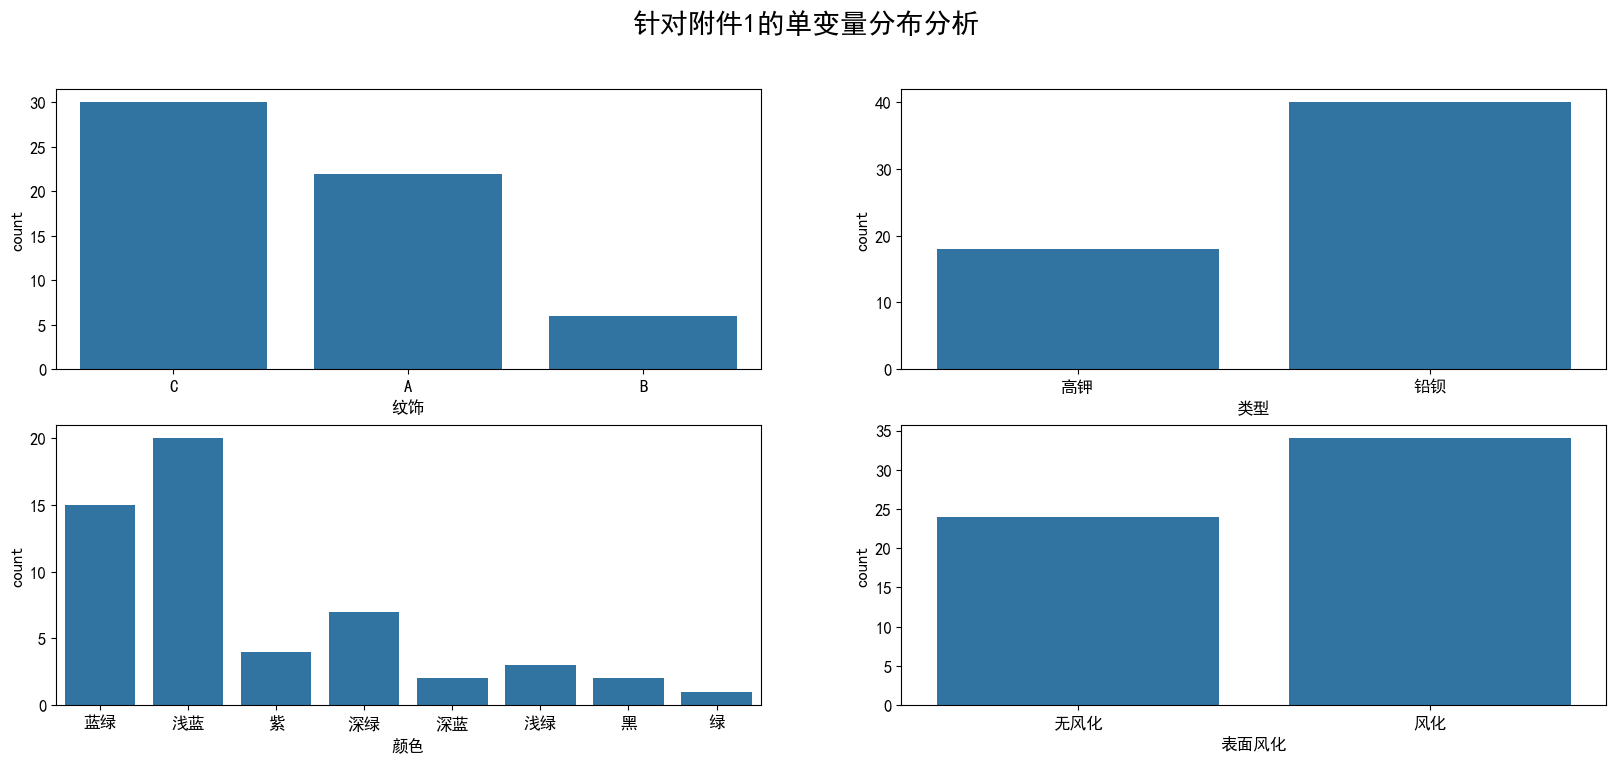

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
fig.suptitle('针对附件1的单变量分布分析', fontsize=20) 
     
sns.countplot(x='纹饰', data=df1, ax=ax[0][0])
sns.countplot(x='类型', data=df1, ax=ax[0][1])
sns.countplot(x='颜色', data=df1, ax=ax[1][0])
sns.countplot(x='表面风化', data=df1, ax=ax[1][1])

fig.savefig('图片\\1_针对附件1的单变量分布分析.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


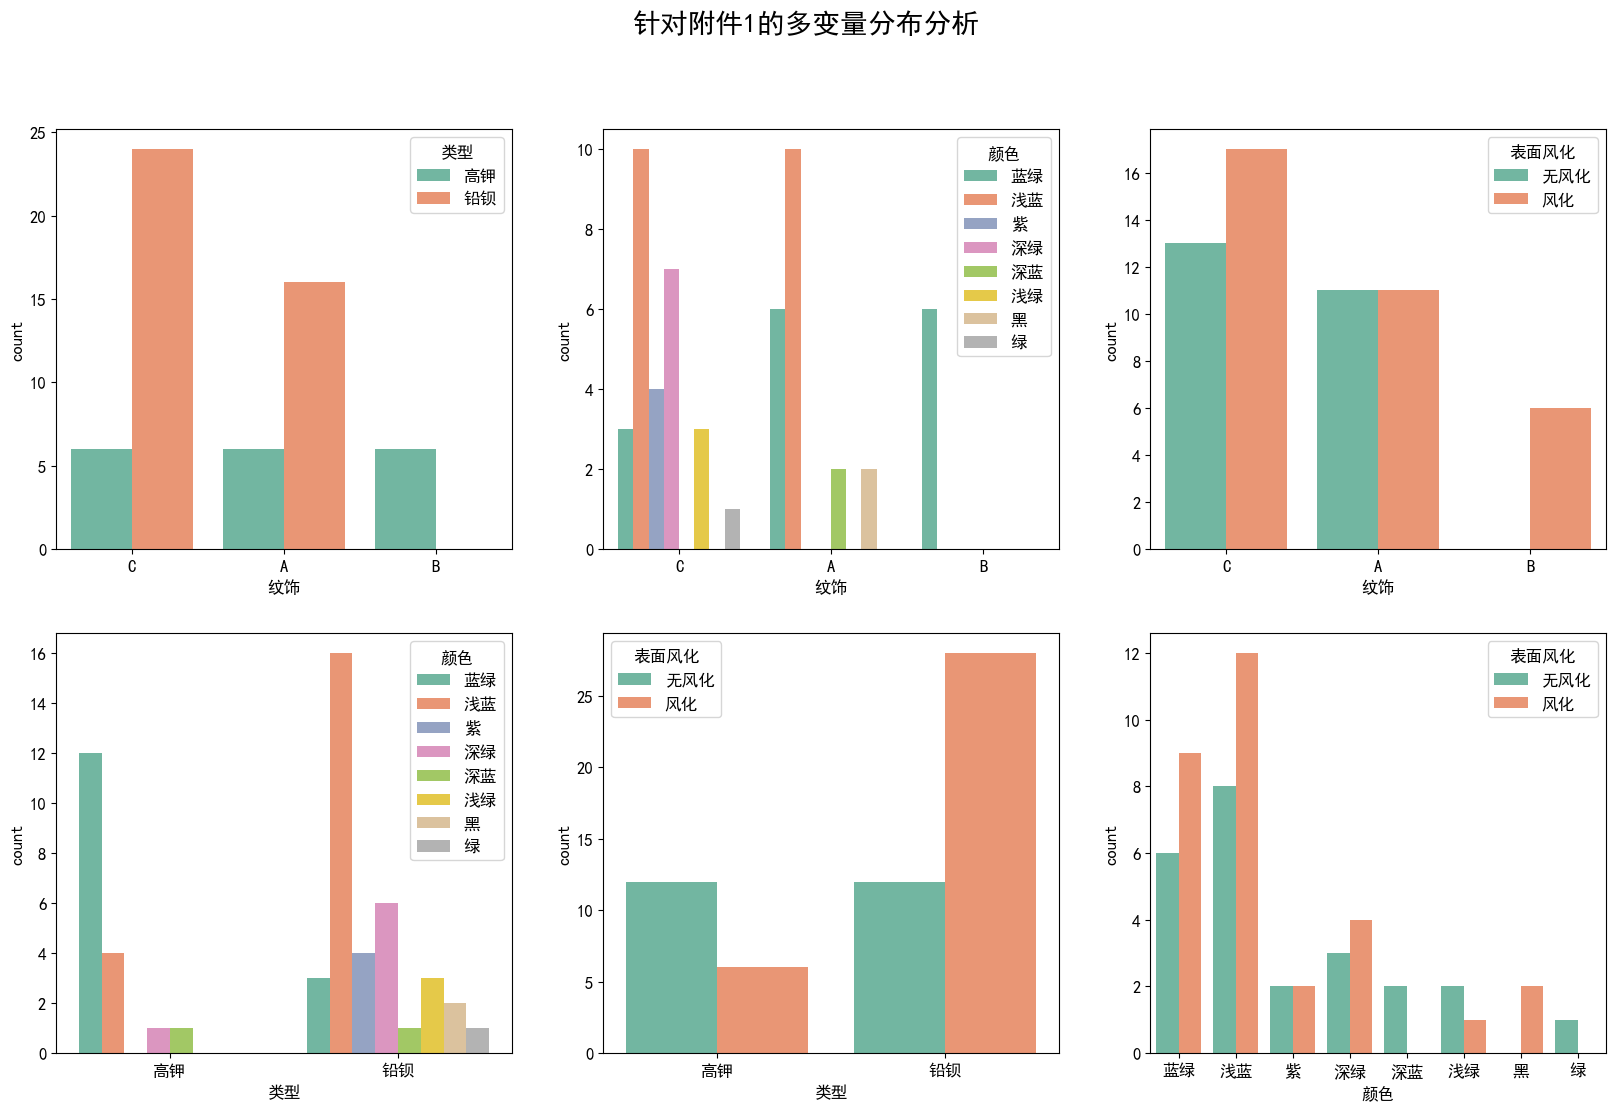

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
fig.suptitle('针对附件1的多变量分布分析', fontsize=20) 

sns.countplot(x='纹饰', hue="类型", palette='Set2', data=df1, ax=ax[0][0])
sns.countplot(x='纹饰', hue="颜色", palette='Set2', data=df1, ax=ax[0][1])
sns.countplot(x='纹饰', hue="表面风化", palette='Set2', data=df1, ax=ax[0][2])
sns.countplot(x='类型', hue="颜色", palette='Set2', data=df1, ax=ax[1][0])
sns.countplot(x='类型', hue="表面风化", palette='Set2', data=df1, ax=ax[1][1])
sns.countplot(x='颜色', hue="表面风化", palette='Set2', data=df1, ax=ax[1][2])

fig.savefig('图片\\2_针对附件1的多变量分布分析.eps')

## ***数据清洗***

In [25]:
df1.isnull().sum()

文物编号    0
纹饰      0
类型      0
颜色      4
表面风化    0
dtype: int64

In [26]:
# 使用黑色填补“颜色”列缺失值
df1['颜色'].fillna("黑色", inplace=True)

# 结果写入文件
df1.to_excel("中间数据集\\经过清洗的数据集1.xlsx")

C:\Users\jack\AppData\Local\Temp\ipykernel_16036\3044853696.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['颜色'].fillna("黑色", inplace=True)


In [27]:
df2.isnull().sum()

文物采样点           0
二氧化硅(SiO2)      0
氧化钠(Na2O)      50
氧化钾(K2O)       28
氧化钙(CaO)        8
氧化镁(MgO)       25
氧化铝(Al2O3)      1
氧化铁(Fe2O3)     24
氧化铜(CuO)        5
氧化铅(PbO)       11
氧化钡(BaO)       16
五氧化二磷(P2O5)    10
氧化锶(SrO)       23
氧化锡(SnO2)      62
二氧化硫(SO2)      61
dtype: int64

In [28]:
# 使用0填补全部缺失值
df2.fillna(0, inplace=True)

In [29]:
df2["Sum"] = (df2.drop("文物采样点", axis=1)).sum(axis=1)
df2.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),Sum
0,01,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61
1,02,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89
2,03部位1,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00
3,03部位2,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88
4,04,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06


In [30]:
# 删除“Sum”列小于85或大于105的样本
df2 = df2[(df2['Sum'] >= 85) & (df2['Sum'] <= 105)]
df2.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),Sum
0,01,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61
1,02,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89
2,03部位1,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00
3,03部位2,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88
4,04,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06


In [31]:
df2 = df2.drop("Sum", axis=1)

# 结果写入文件
df2.to_excel("中间数据集\\经过清洗的数据集2.xlsx", index=False)

In [32]:
# 使用0填补全部缺失值
df3.fillna(0, inplace=True)

# 结果写入文件
df3.to_excel("中间数据集\\经过清洗的数据集3.xlsx", index=False)

## ***数据拼接***

In [33]:
# 使用正则表达式进行拆分
df2[['文物编号', '采样位置']] = df2['文物采样点'].str.split('(?<=\d)(?=\D)', expand=True)
df2 = df2.drop("文物采样点", axis=1)
df2.head()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),文物编号,采样位置
0,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,01,None
1,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,02,None
2,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,03,部位1
3,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,03,部位2
4,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,04,None


In [35]:
df1["文物编号"] = df1["文物编号"].astype(int)
df2["文物编号"] = df2["文物编号"].astype(int)

df_combined = pd.merge(df1, df2, on="文物编号", how="right")
df_combined.head()

,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),采样位置
0,1,C,高钾,蓝绿,无风化,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,None
1,2,A,铅钡,浅蓝,风化,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,None
2,3,A,高钾,蓝绿,无风化,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,部位1
3,3,A,高钾,蓝绿,无风化,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,部位2
4,4,A,高钾,蓝绿,无风化,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,None


In [36]:
df_combined['风化具体情况'] = df_combined.apply(
    lambda row: '无风化' if row['表面风化'] == '无风化' 
    else ('无风化' if row['采样位置'] == '未风化点' else '风化'), 
    axis=1
    )
df_combined.head()

,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),...,氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),采样位置,风化具体情况
0,1,C,高钾,蓝绿,无风化,69.33,0.0,9.99,6.32,0.87,...,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,None,无风化
1,2,A,铅钡,浅蓝,风化,36.28,0.0,1.05,2.34,1.18,...,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,None,风化
2,3,A,高钾,蓝绿,无风化,87.05,0.0,5.19,2.01,0.00,...,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,部位1,无风化
3,3,A,高钾,蓝绿,无风化,61.71,0.0,12.37,5.87,1.11,...,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,部位2,无风化
4,4,A,高钾,蓝绿,无风化,65.88,0.0,9.67,7.12,1.56,...,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,None,无风化


In [37]:
# 结果写入文件
df_combined.to_excel("中间数据集\\表1与表2拼接后的数据集.xlsx", index=False)